# WeatherPy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy
from api_keys import WEATHER_API_KEY

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={WEATHER_API_KEY}'
    
    # Log the city, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 1 | kenai
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | kingston
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | antakotako
City not found. Skipping...
Processing Record 7 of Set 1 | sanming
Processing Record 8 of Set 1 | tahe
Processing Record 9 of Set 1 | kapuskasing
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | ghadamis
Processing Record 14 of Set 1 | coahuayana de hidalgo
Processing Record 15 of Set 1 | el bauga
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | chonchi
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | belyayevka
Processing Record 20 of Set 1 | dudinka
Processing Record 21 of Set 1 | mahina
Processing Record 22

In [9]:
city_df = pd.DataFrame(city_data)

city_df.count()


City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [21]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kenai,60.5544,-151.2583,42.89,87,100,3.09,US,1714541374
1,margaret river,-33.9500,115.0667,72.09,57,100,6.99,AU,1714541106
2,kingston,17.9970,-76.7936,83.35,61,75,4.12,JM,1714541313
3,albany,42.6001,-73.9662,58.26,82,100,1.77,US,1714541254
4,sanming,26.2486,117.6186,65.26,91,100,1.20,CN,1714541377


In [14]:
city_df.to_csv('output_data/cities.csv', index_label='City_ID')

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy
from api_keys import WEATHER_API_KEY
from util.functions import make_scatter

In [2]:
city_df = pd.read_csv('output_data/cities.csv', index_col='City_ID')
city_df['Date'] = pd.to_datetime(city_df['Date'], unit='s')
city_df['Date'] = city_df['Date'].dt.strftime('%d/%m/%y')
city_df['Max Temp'] = round((9/5) * (city_df['Max Temp'] - 273.15) + 32, 2) 
city_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kenai,60.5544,-151.2583,42.89,87,100,3.09,US,01/05/24
1,margaret river,-33.9500,115.0667,72.09,57,100,6.99,AU,01/05/24
2,kingston,17.9970,-76.7936,83.35,61,75,4.12,JM,01/05/24
3,albany,42.6001,-73.9662,58.26,82,100,1.77,US,01/05/24
4,sanming,26.2486,117.6186,65.26,91,100,1.20,CN,01/05/24
...,...,...,...,...,...,...,...,...,...
545,dartmouth,44.6713,-63.5772,38.75,83,40,3.13,CA,01/05/24
546,namie,37.4833,141.0000,59.54,75,100,3.96,JP,01/05/24
547,bonthe,7.5264,-12.5050,80.38,88,77,2.09,SL,01/05/24


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

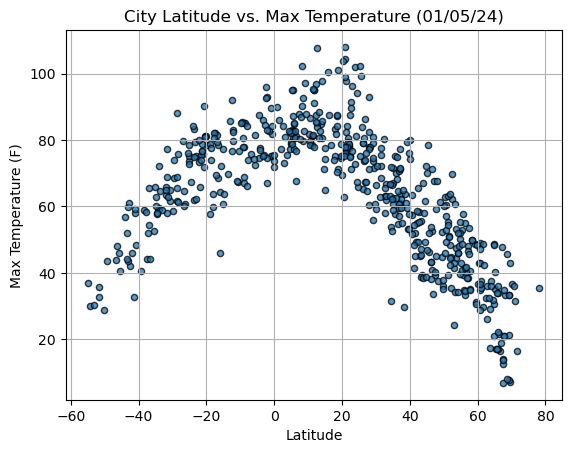

In [8]:
make_scatter(city_df, 'Lat', 'Max Temp') 
plt.grid(True)
plt.title(f'City Latitude vs. Max Temperature ({city_df.iloc[0,8]})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig("output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity


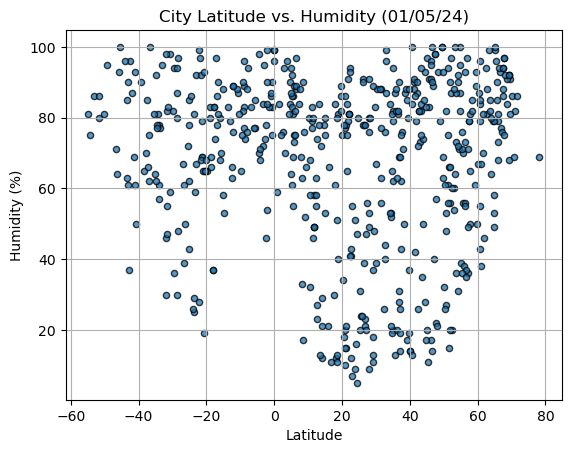

In [9]:
make_scatter(city_df, 'Lat', 'Humidity') 
plt.grid(True)
plt.title(f'City Latitude vs. Humidity ({city_df.iloc[0,8]})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

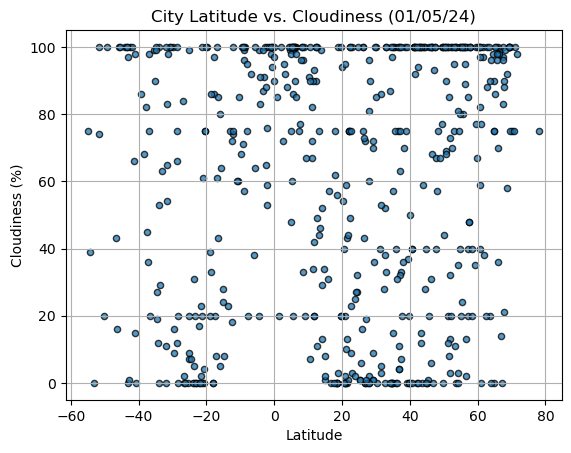

In [10]:
make_scatter(city_df, 'Lat', 'Cloudiness') 
plt.grid(True)
plt.title(f'City Latitude vs. Cloudiness ({city_df.iloc[0,8]})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

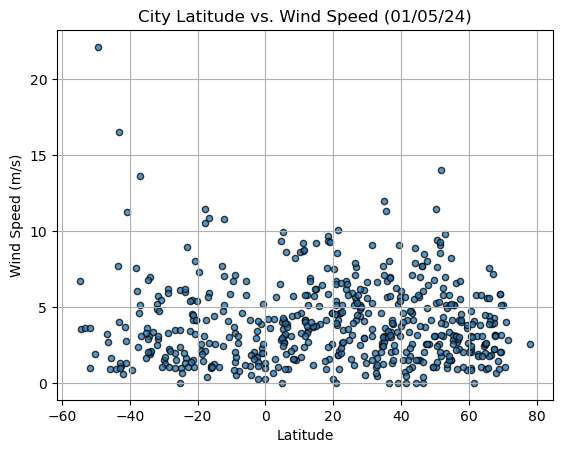

In [11]:
make_scatter(city_df, 'Lat', 'Wind Speed') 
plt.grid(True)
plt.title(f'City Latitude vs. Wind Speed ({city_df.iloc[0,8]})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

plt.savefig("output_data/Fig4.png")

plt.show()